In [1]:
from qiskit import * 
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [11]:
secret_number = '111000111'

In [12]:
circuit = QuantumCircuit(len(secret_number)+1, len(secret_number))

circuit.h(range(len(secret_number)))
circuit.x(len(secret_number))
circuit.h(len(secret_number))

circuit.barrier()

for ii, yesno in enumerate(reversed(secret_number)):
    if yesno == '1':
        circuit.cx(ii, len(secret_number))

circuit.barrier()

circuit.h(range(len(secret_number)))

circuit.barrier()

circuit.measure(range(len(secret_number)), range(len(secret_number)))



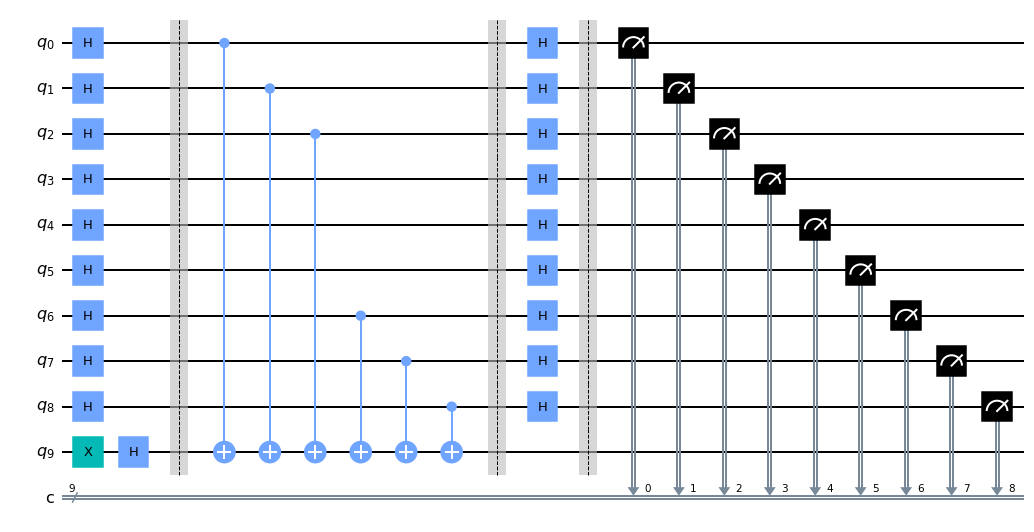

In [13]:
circuit.draw(output='mpl')

## Simulation

In [14]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()

print(counts)

{'111000111': 1}
